# ***Problem Statement For AirBnb Hotel Booking:***

The hospitality industry is transforming due to online short-term lodging platforms like Airbnb.
This analysis focuses on New York City Airbnb dataset, with goals such as:

* Data cleaning and exploration

* Understanding listing availability, pricing, and customer satisfaction

* Finding relationships between property features and price

* Helping stakeholders understand Airbnb’s operations in NYC

In [1]:
# importing the essential libraries Used in this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Open the file in the pandas
df=pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

# **Questions to Answer:**

1. What are the different property types in the dataset?

2. Which neighborhood group has the highest number of listings?

3. Which neighborhood group has the higher average prices for Airbnb listings?

4. Is there a relationship between the construction year of property and price?

5. Who are the top 10 hosts with most listings?

6. Are hosts with verified identities more likely to receive positive reviews?

7. Is there a correlation between the price of a listing and service fee?

8. What is the average review rate (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?


In [34]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [35]:
# retrieving the informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

***There can be problems in the data we are going to check it***

1. duplicated records in the data.

2. Missing values in some records.

3. There can be currency sign in the columns like fee.

4. The currency for price and service fee were not added to the column’s titles.



6. Columns like the price, service fee, id, host id, last review, construction year are assigned wrong datatypes.

7. In the neighborhood group column, the spelling of Brooklyn was misspelt in some records.

8. Some outliers were identified in the availability_365 column.

In [36]:
# duplicated records in the data.
df.duplicated().value_counts()

,count
False,102058
True,541


In [37]:
# Missing Values can be recorded.
df.isnull().sum()

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [38]:
# Checking for currency sign in the columns like fee.
df['service fee'].sample(10)
df['price'].sample(10)

,price
70953,748.0
44069,1129.0
20295,277.0
97086,446.0
36997,945.0
3317,257.0
101926,1086.0
36871,691.0
36500,877.0
7793,812.0


In [39]:
# Columns like the construction year are assigned wrong datatypes.
df.dtypes

,0
id,int64
NAME,object
host id,int64
host_identity_verified,object
host name,object
neighbourhood group,object
neighbourhood,object
lat,float64
long,float64
country,object


In [41]:
# In the neighborhood group column, the spelling of Brooklyn was misspelt in some records.
df['neighbourhood group'].unique()

# brookln and manhatan

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

<Axes: >

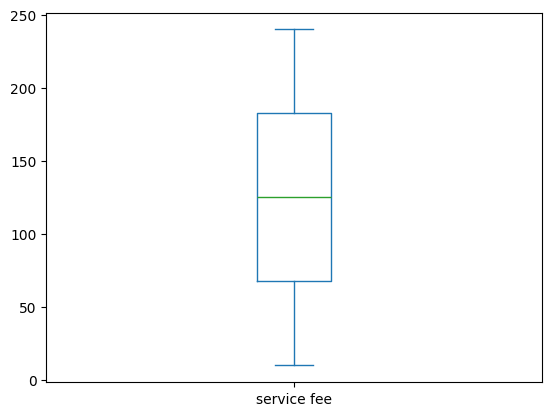

In [42]:
# Some outliers were identified in the columns.

# df['availability 365'].plot(kind='box')
# df['price'].plot(kind='box')
df['service fee'].plot(kind='box')

**CLEAN THE DATA**

**Steps to be Taken for Data Cleaning:**

1. Drop duplicated records.

2. Drop house_rules and license columns with insufficient data.

3. Rename the price and service fee columns to include a dollar sign.

4. Drop all records with missing values.

5. Change all mismatched data types to the appropriate ones.

6. Correct the spelling of brooklyn to Brooklyn manhatan to Manhattan.

7. Get rid of outliers in the availability_365 column data.

In [71]:
# All the duplicated values are removed because it give us wrong insights for our data
df.drop_duplicates(inplace=True)

In [72]:
# Drop house_rules and license columns with insufficient data. These columns have more null values and than they are not useful.
df.drop(['house_rules','license'], axis=1,inplace=True)

KeyError: "['house_rules', 'license'] not found in axis"

In [73]:
df.head(2)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,Price in $,service fee in $,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30,45.0,2022-05-21,0.38,4.0,2.0,228.0


In [74]:
# Rename the price and service fee columns to include a dollar sign. To represents the currency in which price and fee is mentioned.
df.rename(columns={
    'price':'Price in $',
    'service fee': 'service fee in $'

},inplace=True)

In [75]:
# brookln is mis spelled
df.replace({'brookln':'Brooklyn',
            'manhatan':'Manhattan'},inplace=True)

In [76]:
# Change all mismatched data types to the appropriate ones.
df['minimum nights']=pd.to_numeric(df['minimum nights'],errors='coerce').astype('Int32')


In [77]:
df.isnull().sum()


,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,406
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [78]:
df.dropna()
# if we drop na we are going to loose 18 percent of the data then we are going to fill some values and check

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,Price in $,service fee in $,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,115.0,3,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009.0,1060.0,212.0,45,49.0,2017-10-05,0.40,5.0,1.0,219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102029,57351953,Cozy room in a 2B with backyard access,5155155913,unconfirmed,Cristina,Queens,Astoria,40.76987,-73.92679,United States,...,2018.0,822.0,164.0,1,9.0,2019-04-25,0.91,3.0,1.0,0.0
102030,57352505,An East Williamsburg Delight,71564706996,verified,Petra,Brooklyn,Bedford-Stuyvesant,40.68335,-73.91222,United States,...,2015.0,455.0,91.0,4,36.0,2018-06-27,1.28,1.0,1.0,0.0
102031,57353057,Cozy bedroom in williamsburg,83101851929,verified,Russell,Brooklyn,Williamsburg,40.70870,-73.96710,United States,...,2020.0,1078.0,216.0,1,58.0,2019-06-10,2.08,5.0,2.0,120.0
102032,57353610,Spacious Room w/ 2 Bed,69037598918,unconfirmed,Christine,Queens,Bayside,40.75047,-73.75349,United States,...,2007.0,103.0,21.0,7,40.0,2019-06-23,1.51,1.0,5.0,148.0


In [79]:
df.shape

(102058, 24)

In [81]:
df1=df.copy() # making copy of the dataset if something wrong happened then it does not affect original dataset

In [82]:
df1['reviews per month'].fillna(df['reviews per month'].mean(),inplace=True)
df1['last review'].fillna(df['last review'].mean(),inplace=True)

In [83]:
df1.dropna().shape

# now we have checked it and we can perform same operation on our dataset

(98487, 24)

In [85]:
df['reviews per month'].fillna(df['reviews per month'].mean(),inplace=True)
df['last review'].fillna(df['last review'].mean(),inplace=True)

In [93]:
df.dropna(inplace=True)

In [94]:
df.shape

(98487, 24)

<Axes: >

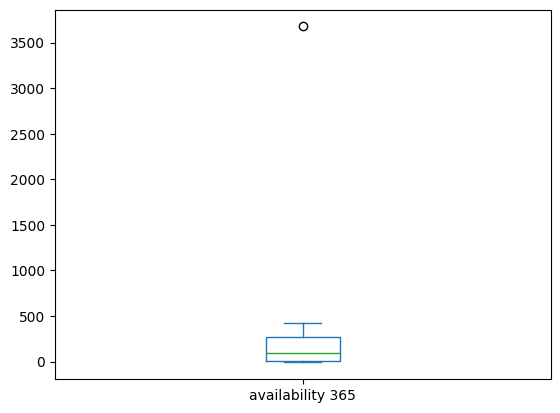

In [95]:
# Get rid of outliers in the availability_365 column data.
df['availability 365'].plot(kind='box')

In [96]:
# removing outliers
def outliers_remove(df,col):
  Q1 = df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]
  print("The lower limit for the column is : ",lower_limit)
  print("The upper limit for the column is : ",upper_limit)
  return df

In [97]:
# Testing the method
outliers_remove(df=df1,col='availability 365')

The lower limit for the column is :  -394.5
The upper limit for the column is :  665.5


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,Price in $,service fee in $,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10,9.0,2021-10-19 00:00:00.000000000,0.210000,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30,45.0,2022-05-21 00:00:00.000000000,0.380000,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3,0.0,2019-06-11 02:12:22.996312064,1.375408,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30,270.0,2019-07-05 00:00:00.000000000,4.640000,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10,9.0,2018-11-19 00:00:00.000000000,0.100000,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,696.0,NaN,7,12.0,2019-03-27 00:00:00.000000000,0.440000,5.0,1.0,0.0
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,909.0,NaN,1,19.0,2017-08-31 00:00:00.000000000,0.720000,3.0,2.0,0.0
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,387.0,NaN,2,50.0,2019-06-26 00:00:00.000000000,3.120000,4.0,2.0,235.0
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,848.0,NaN,2,0.0,2019-06-11 02:12:22.996312064,1.375408,1.0,1.0,0.0


In [98]:
df=outliers_remove(df,'availability 365')

The lower limit for the column is :  -394.5
The upper limit for the column is :  665.5


In [99]:
df.shape

(98486, 24)

In [100]:
df.duplicated().value_counts()

,count
False,98486


In [102]:
# The size is reduced and the data types are changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98486 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              98486 non-null  int64         
 1   NAME                            98486 non-null  object        
 2   host id                         98486 non-null  int64         
 3   host_identity_verified          98486 non-null  object        
 4   host name                       98486 non-null  object        
 5   neighbourhood group             98486 non-null  object        
 6   neighbourhood                   98486 non-null  object        
 7   lat                             98486 non-null  float64       
 8   long                            98486 non-null  float64       
 9   country                         98486 non-null  object        
 10  country code                    98486 non-null  object        
 11  instan

**Exploratory Data Analysis (EDA):**

 Helps us understand the dataset and prepare it for modeling. It includes checking the number and types of features, identifying missing values, and handling them using methods like mean or median imputation. Outliers in columns such as price or availability_365 are detected and removed using the IQR method to avoid skewing the results. EDA also examines the distribution of numerical and categorical variables using plots and charts, and studies relationships between features through correlation analysis. Additionally, new features can be created to capture useful patterns. Overall, EDA provides insights, highlights data issues, and guides data cleaning and modeling steps.

<Axes: xlabel='room type'>

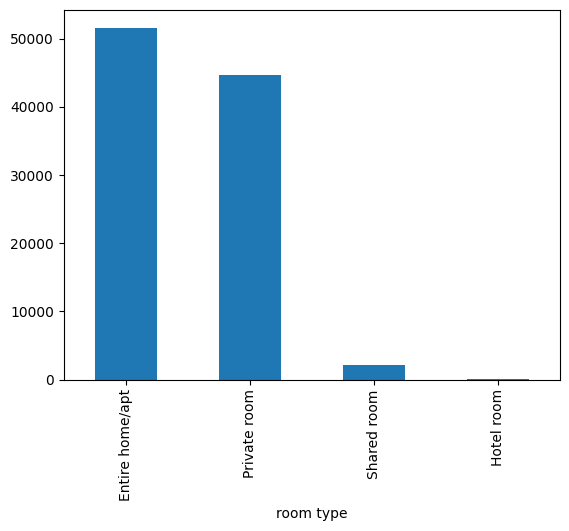

In [103]:

df['room type'].value_counts().plot(kind='bar')

In [106]:
# Which neighborhood group has the highest number of listings?
df['neighbourhood group'].value_counts()


,count
neighbourhood group,
Manhattan,42021
Brooklyn,40195
Queens,12765
Bronx,2590
Staten Island,915


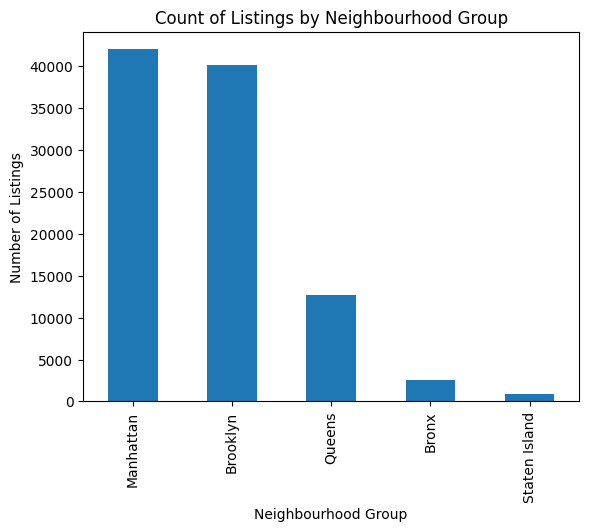

In [107]:

df['neighbourhood group'].value_counts().plot(kind='bar')
plt.title('Count of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')

plt.show()

From the above graph we conclude that the Manhattan neighbourhood group have the highest number of listing.

In [111]:

# Which neighborhood group has the higher average prices for Airbnb listings?
price_bar=df.groupby(['neighbourhood group'])['Price in $'].mean().to_frame()

price_bar

,Price in $
neighbourhood group,
Bronx,630.778764
Brooklyn,626.384700
Manhattan,623.189619
Queens,629.638073
Staten Island,622.410929


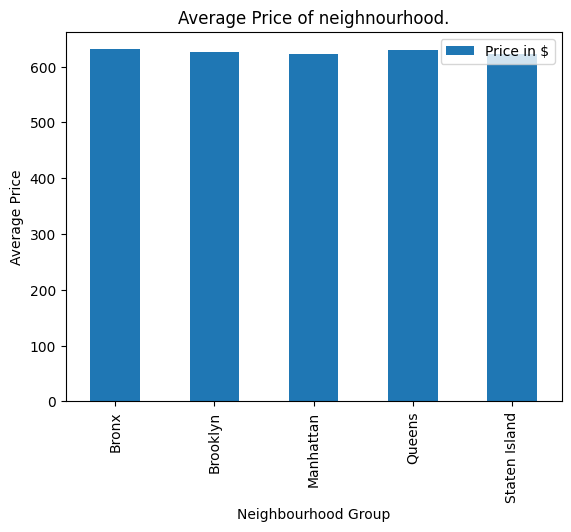

In [112]:
price_bar.plot(kind='bar')

plt.title('Average Price of neighnourhood.')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')

plt.show()

We conclude that there is a little difference in the average price of the neighbourhoods for airnb listings.

In [113]:
# Is there a relationship between the construction year of property and price?
df['Price in $'].corr(df['Construction year'])



np.float64(-0.0037373395184870464)

<Axes: xlabel='Construction year'>

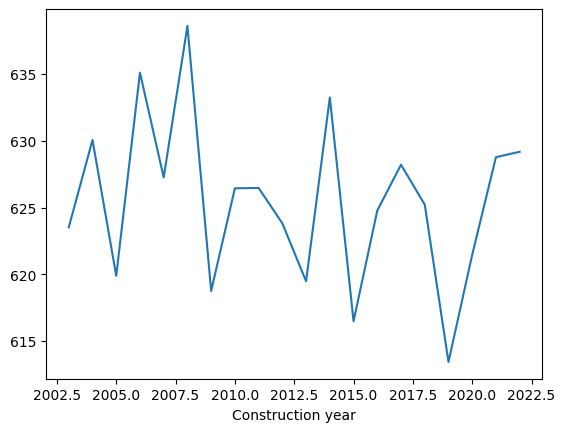

In [114]:
df.groupby('Construction year')['Price in $'].mean().plot()


we can say that there is no relationship between the construction year and the price column.

In [115]:
# Who are the top 10 hosts with most listings?

df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).head(10)

,calculated host listings count
host name,
Sonder (NYC),153450.0
Blueground,76152.0
Karen,42449.0
Jeniffer,31571.0
Kara,26932.0
Sonder,19584.0
Kaz,17552.0
Ken,17407.0
Corporate Housing,16471.0


<Axes: xlabel='host name'>

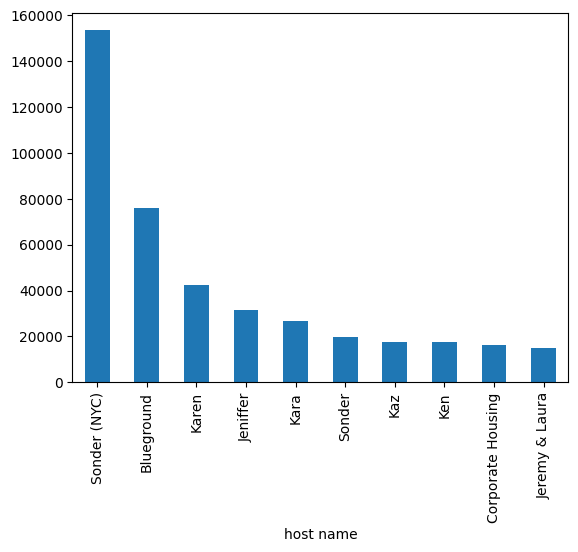

In [116]:
df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [117]:
# Are hosts with verified identities more likely to receive positive reviews?

df.groupby('host_identity_verified')['number of reviews'].mean()

,number of reviews
host_identity_verified,
unconfirmed,27.43923
verified,27.21161


<Axes: xlabel='host_identity_verified'>

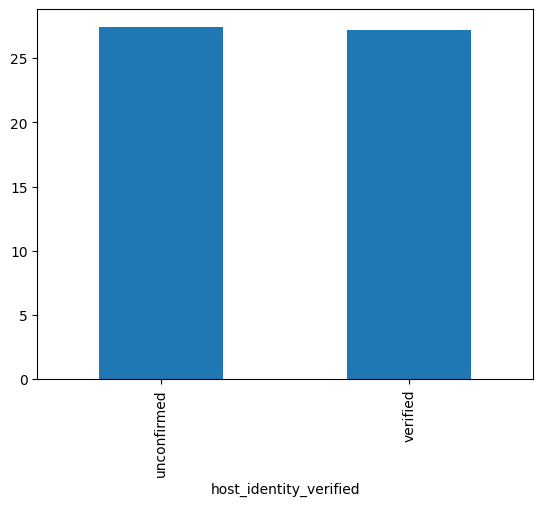

In [183]:
df.groupby('host_identity_verified')['number of reviews'].mean().plot(kind='bar')

There is no evidence from which we say that the verfied hosts can get more positive reviews.

In [118]:
df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,Price in $,service fee in $,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10,9.0,2018-11-19,0.10,3.0,1.0,289.0


In [119]:
# Is there a correlation between the price of a listing and service fee?
df['Price in $'].corr(df['service fee in $'])

np.float64(0.9999908839178387)

<Axes: xlabel='Price in $', ylabel='service fee in $'>

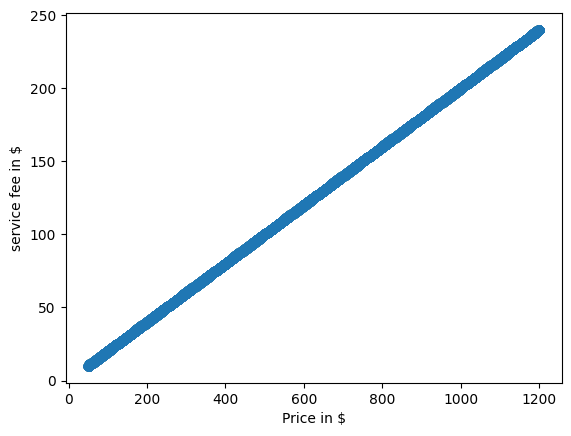

In [120]:
sns.regplot(x='Price in $',y='service fee in $',data=df)

From the graph it can be seen that the price is increasing and than the service fee is also increasing so there is a positive relationship between them.

In [121]:
# What is the average review rate (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

arrn=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
arrn.unstack()

review rate number                                    
room type              Entire home/apt Hotel room Private room Shared room
neighbourhood group                                                       
Bronx                         3.354872        NaN     3.317850    3.296296
Brooklyn                      3.249116   3.833333     3.263383    3.340938
Manhattan                     3.277917   3.500000     3.278998    3.265046
Queens                        3.344869   3.750000     3.307516    3.368571
Staten Island                 3.329694        NaN     3.478555    3.428571

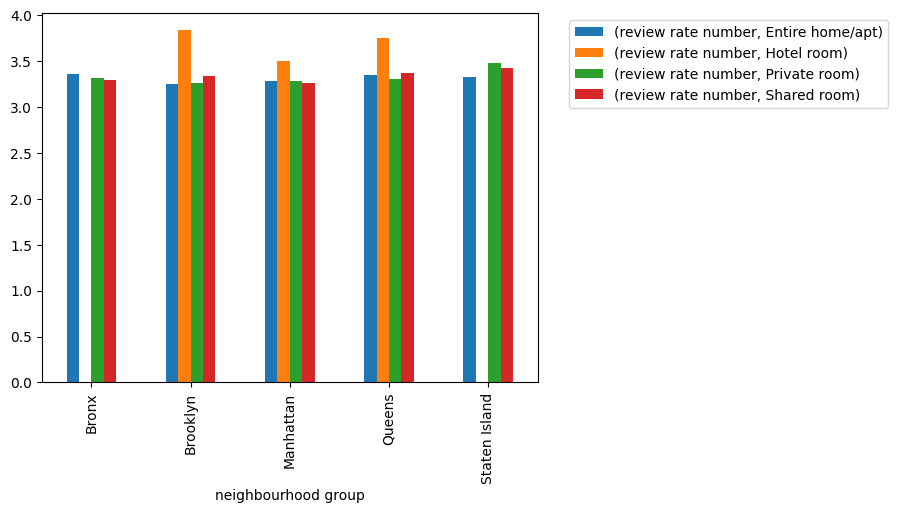

In [122]:
arrn.unstack().plot(kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


So yes we can say that the average review rate is varried based on the neighbourhood groups.

Like
1. When neighbourhood is Brooklyn the hotel room are best. And same for Manhattan and Queens groups.
2. While When neighbourhood is Bronx and Staten Island the Hotel room doesn't get best ratings.

In [136]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
chl=df.groupby(['calculated host listings count'])['availability 365'].mean().reset_index()
chl

,calculated host listings count,availability 365
0,1.0,114.490960
1,2.0,144.295081
2,3.0,165.367402
3,4.0,183.644691
4,5.0,200.945292
...,...,...
72,208.0,157.965000
73,218.0,251.115385
74,232.0,256.306273
75,327.0,300.757576


<Axes: xlabel='calculated host listings count', ylabel='availability 365'>

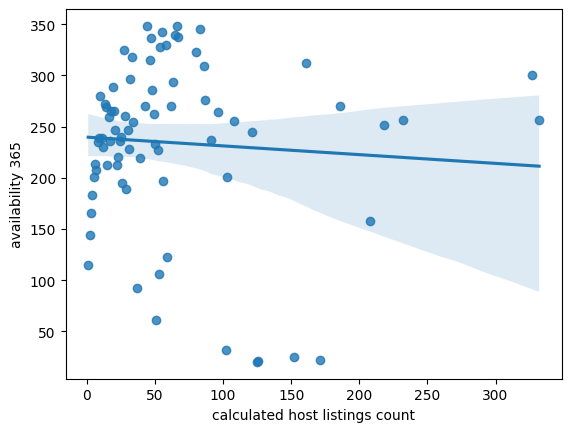

In [140]:
sns.regplot(x='calculated host listings count',y='availability 365',data=chl)

**We can say that this is not true that:**
> hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year.

